# Example 4b: Dynamical nonequilibrium trap - Analyzing experimental data with pretrained network

Example code to analyze experimental data with DeepCalib using a pretrained network.

<strong>DeepCalib 1.0</strong><br/>
Enhanced force-field calibration via machine learning<br/>
version 1.0 - 27 April 2020<br/>
© Aykut Argun, Tobias Thalheim, Stefano Bo, Frank Cichos & Giovanni Volpe <br/>
[Soft Matter Lab](http://www.softmatterlab.org)

## 1. INIZIALIZATION

In [1]:
import DeepCalib

## 2. Import and visualize the experimental trajectory to be analyzed 

<a id="sec2"></a>

Here we import and visualize the experimental trajectory. 

Comments:
1. Make sure you define the same scaling functions for the inputs and the targets the same in the training file.  

Text(0.5, 1.0, 'Trajectory with switching potential')

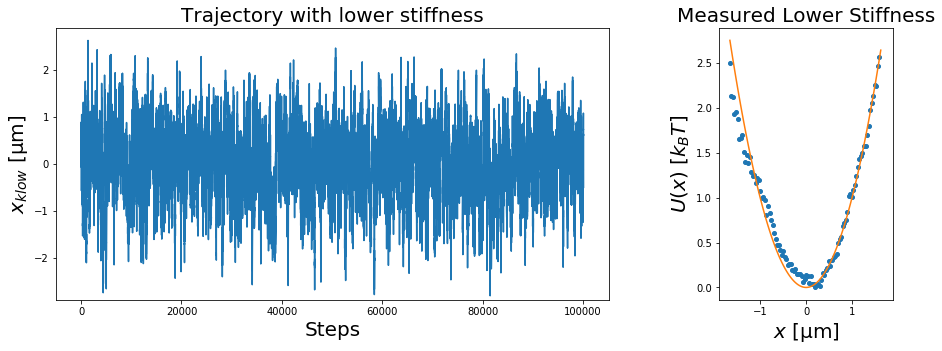

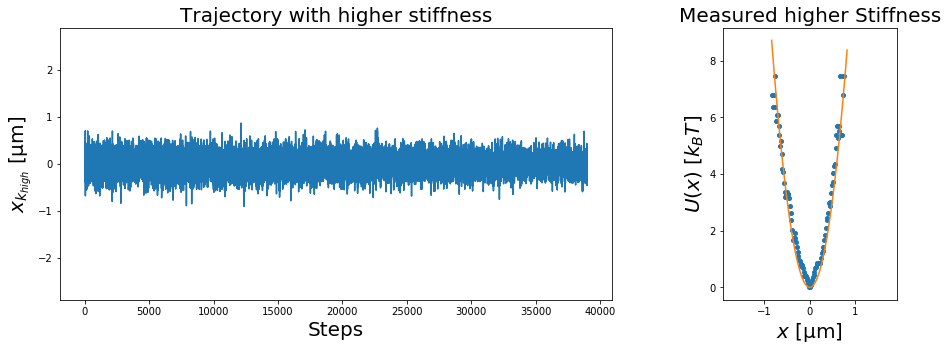

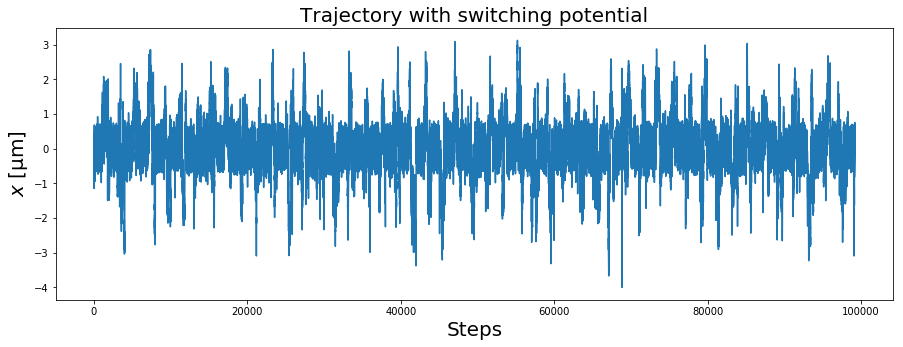

In [2]:
### Import the data 

import numpy as np 
import scipy.io as sci
from scipy.constants import Boltzmann as kB

data_name = 'Data_Example4b'
x       = sci.loadmat(data_name)['x']
x       = x.reshape(x.size,)
x_klow  = sci.loadmat(data_name)['x_klow']
x_klow  = x_klow.reshape(x_klow.size,)
x_khigh = sci.loadmat(data_name)['x_khigh']  
x_khigh = x_khigh.reshape(x_khigh.size,)

k_low   = 4.1e-9
k_high  = 52e-9

### Visualize the trajectory of the lower stiffness 

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(3,9)
plt.subplot(gs[:,0:6])
plt.ylabel('$x_{klow}$ [\u03BCm]',fontsize=20)                     
plt.xlabel('Steps',fontsize=20)
plt.title('Trajectory with lower stiffness',fontsize=20)
plt.plot(x_klow)
plt.ylim([-2.9, 2.9])

plt.subplot(gs[:,7:9])
plt.xlabel('$x$ [\u03BCm]',fontsize=20)                     
plt.ylabel('$U(x)$ [$k_BT$]',fontsize=20)
plt.title('Measured Lower Stiffness',fontsize=20)
l = (np.arange(100)-50)/30
h = np.histogram(x_klow, bins = l)[0]
U = -np.log(h[h>0]) + np.log(np.max(h)) 
plt.plot(l[:-1][h>0],U,'.', markersize=8)
plt.plot(l, l**2*1e-12*k_low/kB/300)
plt.xlim([-1.9, 1.9])

### Visualize the trajectory of the higher stiffness 

fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(3,9)
plt.subplot(gs[:,0:6])
plt.ylabel('$x_{k_{high}}$ [\u03BCm]',fontsize=20)                     
plt.xlabel('Steps',fontsize=20)
plt.title('Trajectory with higher stiffness',fontsize=20)
plt.plot(x_khigh)
plt.ylim([-2.9, 2.9])


plt.subplot(gs[:,7:9])
plt.xlabel('$x$ [\u03BCm]',fontsize=20)                     
plt.ylabel('$U(x)$ [$k_BT$]',fontsize=20)
plt.title('Measured higher Stiffness',fontsize=20)
l = (np.arange(100)-50)/60
h = np.histogram(x_khigh, bins = l)[0]
U = -np.log(h[h>0]) + np.log(np.max(h)) 
plt.plot(l[:-1][h>0],U,'.', markersize=8)
plt.plot(l, l**2*1e-12*k_high/kB/300 )
plt.xlim([-1.9, 1.9])


fig = plt.figure(figsize=(15, 5))
plt.plot(x)
plt.ylabel('$x$ [\u03BCm]',fontsize=20)                     
plt.xlabel('Steps',fontsize=20)
plt.title('Trajectory with switching potential',fontsize=20)


In [5]:
### Analyze the data

from keras.models import load_model
import numpy as np
from scipy.constants import Boltzmann as kB
network = load_model('Network_Example_4a.h5')
predictions_klow  = []
predictions_khigh = []
predictions_f     = []
oversamp = 10
nmeas = 100
steps = int((x.size-1000*oversamp)/nmeas)
slength = 1000*oversamp

for i in range(nmeas):
    x_crop = x[(i*steps):(i*steps+slength):oversamp]       
    predicted_klow, predicted_khigh, predicted_f = DeepCalib.predict(network, x_crop)[0]
    predictions_klow.append(predicted_klow)
    predictions_khigh.append(predicted_khigh)
    predictions_f.append(predicted_f)


k0 = 25e-9
f0 = 0.05
rescale_targets = lambda scaled_kx, scaled_ky, scaled_f: [10**scaled_kx * k0,
                                                          10**scaled_ky * k0,
                                                          10**scaled_f  * f0]   # Inverse of targets_scaling

[predictions_klow , predictions_khigh, predictions_f] = rescale_targets(*np.array([predictions_klow , predictions_khigh, predictions_f]))


Text(0, 0.5, 'Measured $\\tau$ [s]')

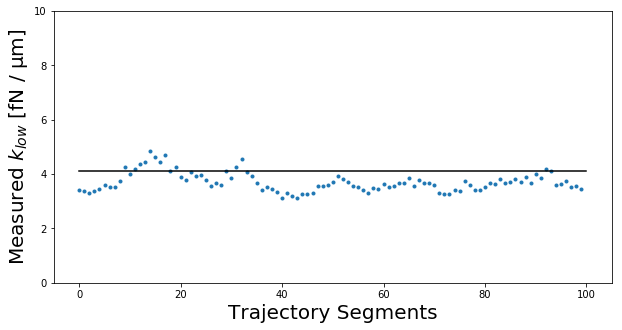

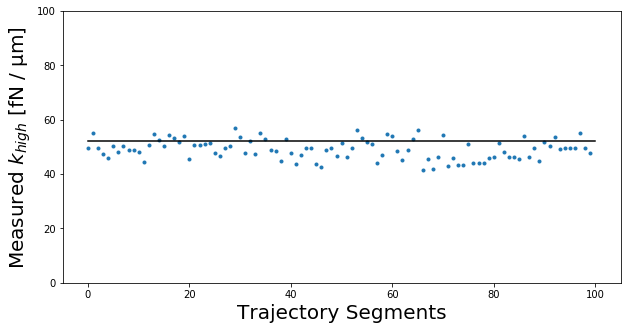

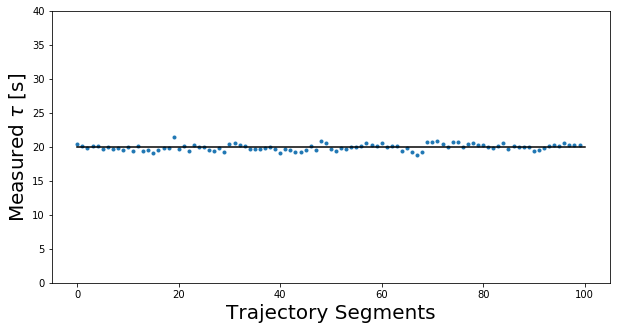

In [6]:
fig = plt.figure(figsize=(10, 5))
plt.plot(predictions_klow*1e9,'.')
plt.ylim([0, 10])
plt.plot([0, 100], np.array([k_low, k_low])*1e9,color='black')
plt.xlabel('Trajectory Segments',fontsize=20)
plt.ylabel('Measured $k_{low}$ [fN / \u03BCm]',fontsize=20)

fig = plt.figure(figsize=(10, 5))
plt.plot(predictions_khigh*1e9,'.')
plt.ylim([0, 100])
plt.plot([0, 100], np.array([k_high, k_high])*1e9,color='black')
plt.xlabel('Trajectory Segments',fontsize=20)
plt.ylabel('Measured $k_{high}$ [fN / \u03BCm]',fontsize=20)


fig = plt.figure(figsize=(10, 5))
plt.plot(1/predictions_f,'.')
plt.ylim([0, 40])
plt.plot([0, 100], [20, 20],color='black')
plt.xlabel('Trajectory Segments',fontsize=20)
plt.ylabel('Measured $\\tau$ [s]',fontsize=20)